# NEO4J

## Anwendung in der Praxis

## How to connect to a Neo4j Database!

Zuerst wird ein Docker Container erstellt. Dieser enthällt einen Container, ein neo4j Image, auf welches durch die Ports 7474 und 7687 zugegriffen wird, sowie auch ein Volume und die Verbindung mit neo4j mit Username und Passwort.

In [1]:
!docker-compose -p completx_sql up -d

 Network completx_sql_default  Creating
 Network completx_sql_default  Created
 Volume "completx_sql_neo4j-data"  Creating
 Volume "completx_sql_neo4j-data"  Created
 Container neo4j-container  Creating
 Container neo4j-container  Created
 Container neo4j-container  Starting
 Container neo4j-container  Started


Um Neo4j zu verwenden, müssen Sie es und seinen Python-Treiber installieren. Darüber hinaus erleichtert die Installation der Bibliothek py2neo die Verbindungen und Interaktionen mit der Neo4j-Datenbank.

In [2]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install py2neo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from py2neo import Graph, Node, Relationship
import csv
import pandas as pd

In [18]:
faelle = pd.read_csv('timeline-faelle-bundeslaender.csv',delimiter=';')
vaccines = pd.read_csv('COVID19_vaccination_municipalities_v202210.csv',delimiter=';')

In [19]:
faelle.head()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen
0,2021-03-01T09:30:00+01:00,1,Burgenland,638575,155435,483140
1,2021-03-01T09:30:00+01:00,2,Kärnten,675557,217933,457624
2,2021-03-01T09:30:00+01:00,3,Niederösterreich,3400756,1141984,2258772
3,2021-03-01T09:30:00+01:00,4,Oberösterreich,2162517,546777,1615740
4,2021-03-01T09:30:00+01:00,5,Salzburg,823353,274598,548755


In [21]:
faelle.tail()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen
6595,2022-12-20T09:30:00+02:00,6,Steiermark,22515339,6653515,15861824
6596,2022-12-20T09:30:00+02:00,7,Tirol,10201158,4456324,5744834
6597,2022-12-20T09:30:00+02:00,8,Vorarlberg,7295131,1652804,5642327
6598,2022-12-20T09:30:00+02:00,9,Wien,73308019,65638829,7669190
6599,2022-12-20T09:30:00+02:00,10,Österreich,204039989,107516250,96523739


In [20]:
vaccines.head()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
0,2024-01-01T23:59:59+01:00,10101,Eisenstadt,15924,12095,11851,9740,3639
1,2024-01-01T23:59:59+01:00,10201,Rust,1978,1595,1572,1329,500
2,2024-01-01T23:59:59+01:00,10301,Breitenbrunn am Neusiedler See,1921,1517,1493,1285,569
3,2024-01-01T23:59:59+01:00,10302,Donnerskirchen,1857,1525,1505,1295,489
4,2024-01-01T23:59:59+01:00,10303,Großhöflein,2085,1739,1711,1411,433


In [22]:
vaccines.tail()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
2110,2024-01-01T23:59:59+01:00,91901,Wien 19. Döbling,75538,56636,54886,44430,17876
2111,2024-01-01T23:59:59+01:00,92001,Wien 20. Brigittenau,86663,59122,56133,39894,12837
2112,2024-01-01T23:59:59+01:00,92101,Wien 21. Floridsdorf,185847,133412,128129,96106,32764
2113,2024-01-01T23:59:59+01:00,92201,Wien 22. Donaustadt,219026,161785,156582,121503,40595
2114,2024-01-01T23:59:59+01:00,92301,Wien 23. Liesing,120393,88895,85791,66808,25195


In [24]:
faelle.shape

(6600, 6)

In [23]:
vaccines.shape

(2115, 8)

In [25]:
faelle.columns.tolist()

['Datum',
 'BundeslandID',
 'Name',
 'Testungen',
 'TestungenPCR',
 'TestungenAntigen']

In [26]:
vaccines.columns.tolist()

['date',
 'municipality_id',
 'municipality_name',
 'municipality_population',
 'vaccination_1',
 'vaccination_2',
 'vaccination_3',
 'vaccination_4+']

Um eine Verbindung zur Datenbank herzustellen, muss eine URL eingeben, über die die Verbindung hergestellt wird, sowie Authentifizierungsdaten, bestehend aus Benutzername und Passwort. Mit py2neo kann dann die Verbindung mithilfe von Graph hergestellt werden. Dies ist auch mit GraphDatabase von noe4j möglich.

In [5]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"
password = "aveQho9yf6tx29vgW3kv"

graph = Graph(uri, auth=(username, password))
driver=GraphDatabase.driver(uri, auth=(username, password))


Um zu überprüfen, ob die Seite aktiv ist, kann diese Funktion verwendet werden:

In [10]:
import requests

url = "http://localhost:7474/browser/"
response = requests.get(url)

if response.status_code == 200:
    print("Website is accessible.")
else:
    print("Failed to access website.")



Website is accessible.


Oder mit localhost:7687 kann man neo4j im Browser starten und sich dann mit den Daten anmelden und schauen ob die Verbindung möglich ist.

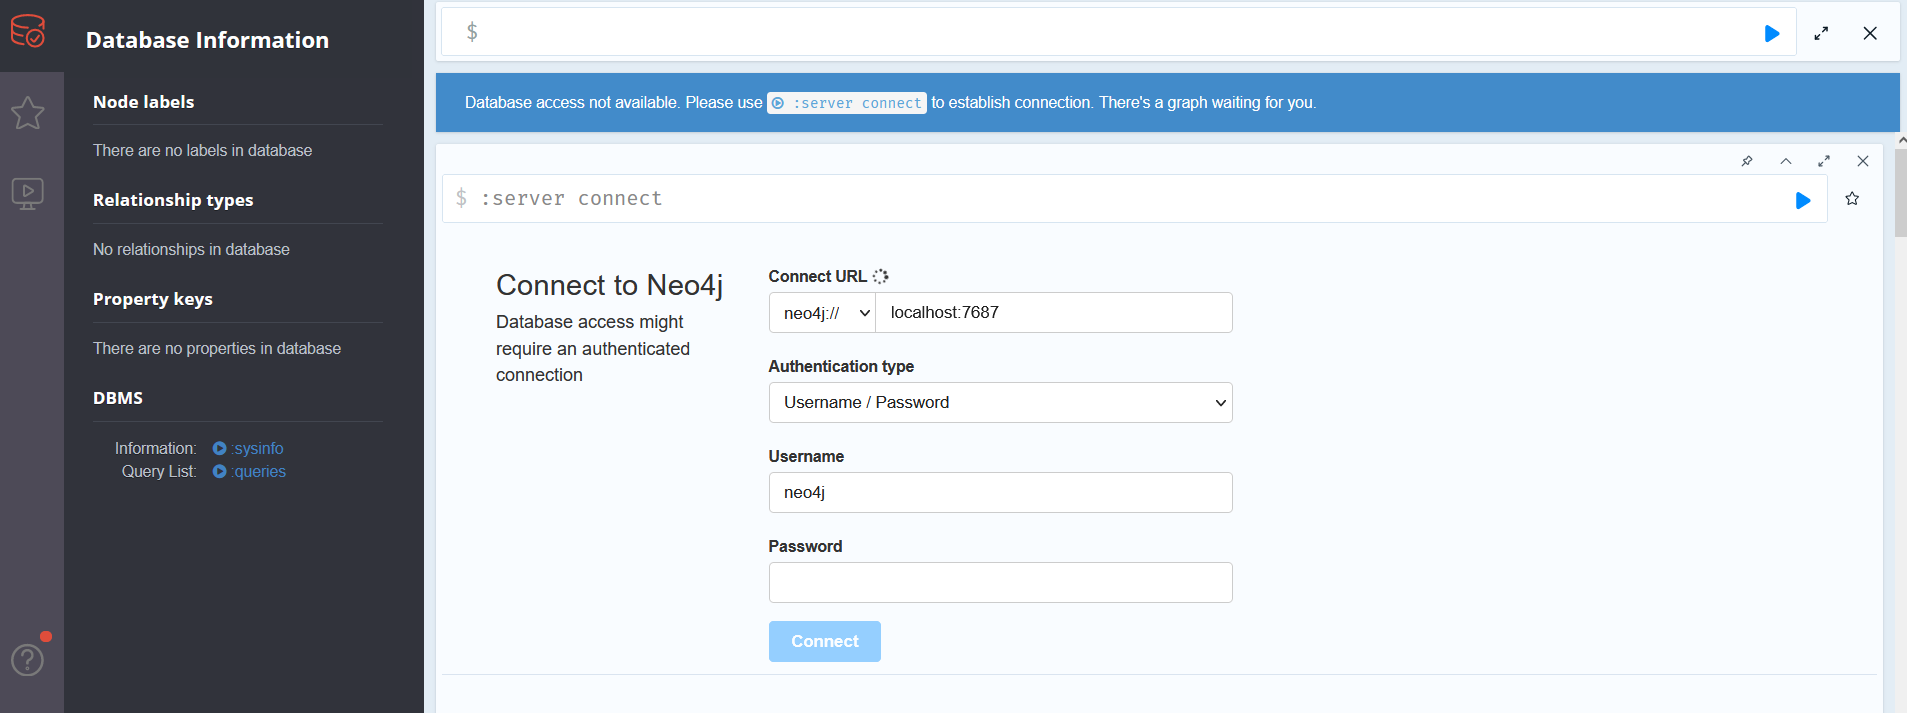

Die Daten können dann mit hilfe von csv, was vorher importiert wurde, einglesen werden und nachdem die Nodes deklariert wurden, kann der Graph erstellt werden mit py2neo.

In [7]:
with open('Wohnregion_Patient.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    # Iterate over each row in the CSV file
    for row in csvreader:
        # Create a Node for each row in the CSV file
        patient_node = Node("Patient",
                            kalenderWoche=row['KW'],
                            wohnort=row['WOHNORT'],
                            Geschlecht=row['GESCHLECHT'],
                            covid=row['COVID'],
                            influenza=row['INFLUENZA'],
                            rsv=row['RSV'],
                            sonstige=row['SONSTIGE'],
                            aufnahmen=row['AUFNAHMEN'],
                            bev_zahl=row['BEV_ZAHL'])
        
        # Add the Node to the graph
        graph.create(patient_node)

Um abzufragen wie viele Nodes in Der Tabelle sind, kann diese Query verwendet werden:

In [9]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS node_count")
    for record in result:
        print(record["node_count"])

13248


In Neo4j wird as Sprache "Cypher" verwendet. In dieser Sprache sind die Nodes mit () dargestellt und die Edges mit [] dargestellt. Hier werden alle Patienten die Covid gehabt haben ausgegeben:

In [9]:
cypher_query = """
MATCH (p:Patient) WHERE p.covid='1'
RETURN p.kalenderWoche, p.wohnort, p.Geschlecht, p.covid, p.influenza, p.rsv, p.sonstige, p.aufnahmen, p.bev_zahl

"""

result = graph.run(cypher_query)

# Print the result
for record in result:
    print(record)

'19. KW 2023'	'BGL'	'M'	'1'	'0'	'0'	'3'	'4'	'13780'
'19. KW 2023'	'BGL'	'W'	'1'	'0'	'0'	'16'	'16'	'12361'
'19. KW 2023'	'KTN'	'M'	'1'	'0'	'0'	'5'	'6'	'24639'
'19. KW 2023'	'NÃ–'	'M'	'1'	'0'	'0'	'14'	'15'	'110830'
'19. KW 2023'	'NÃ–'	'W'	'1'	'0'	'0'	'6'	'7'	'38530'
'19. KW 2023'	'NÃ–'	'W'	'1'	'0'	'0'	'0'	'1'	'125900'
'19. KW 2023'	'NÃ–'	'W'	'1'	'0'	'0'	'6'	'7'	'197835'
'19. KW 2023'	'NÃ–'	'W'	'1'	'0'	'0'	'2'	'3'	'83246'
'19. KW 2023'	'OÃ–'	'M'	'1'	'0'	'0'	'5'	'6'	'163750'
'19. KW 2023'	'OÃ–'	'W'	'1'	'0'	'0'	'0'	'1'	'122614'
'19. KW 2023'	'OÃ–'	'W'	'1'	'0'	'0'	'7'	'8'	'99157'
'19. KW 2023'	'SBG'	'M'	'1'	'0'	'0'	'4'	'5'	'33199'
'19. KW 2023'	'SBG'	'M'	'1'	'0'	'0'	'10'	'11'	'21501'
'19. KW 2023'	'SBG'	'W'	'1'	'0'	'0'	'2'	'3'	'62089'
'19. KW 2023'	'SBG'	'W'	'1'	'0'	'0'	'0'	'1'	'62089'
'19. KW 2023'	'ST'	'M'	'1'	'0'	'0'	'3'	'4'	'107003'
'19. KW 2023'	'ST'	'M'	'1'	'0'	'0'	'5'	'6'	'138876'
'19. KW 2023'	'ST'	'M'	'1'	'1'	'0'	'9'	'11'	'81587'
'19. KW 2023'	'ST'	'W'	'1'	'0'	'0'	'8'	'9'	'27516'
'1

Dies kann auch mit panda dargestellt werden:

In [10]:
import pandas as pd

# Assuming you have already executed the cypher_query and stored the result in 'result'
cypher_query = """
MATCH (p:Patient) WHERE p.covid='1'
RETURN p.kalenderWoche, p.wohnort, p.Geschlecht, p.covid, p.influenza, p.rsv, p.sonstige, p.aufnahmen, p.bev_zahl

"""

result = graph.run(cypher_query)

# Extract data from result
data = [dict(record) for record in result]

# Convert the result to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


     p.kalenderWoche p.wohnort p.Geschlecht p.covid p.influenza p.rsv  \
0        19. KW 2023       BGL            M       1           0     0   
1        19. KW 2023       BGL            W       1           0     0   
2        19. KW 2023       KTN            M       1           0     0   
3        19. KW 2023       NÃ–            M       1           0     0   
4        19. KW 2023       NÃ–            W       1           0     0   
...              ...       ...          ...     ...         ...   ...   
3197     12. KW 2024         V            M       1           0     0   
3198     12. KW 2024         W            M       1           0     0   
3199     12. KW 2024         W            M       1           1     1   
3200     12. KW 2024         W            W       1           2     0   
3201     12. KW 2024         W            W       1           0     0   

     p.sonstige p.aufnahmen p.bev_zahl  
0             3           4      13780  
1            16          16      12361  


In dem Neo4j Browser kann man auch alle vorhandenen Eigenschaften einer Column sehen. Dies wird erreicht durch das Anklicken des markierten Feldes:

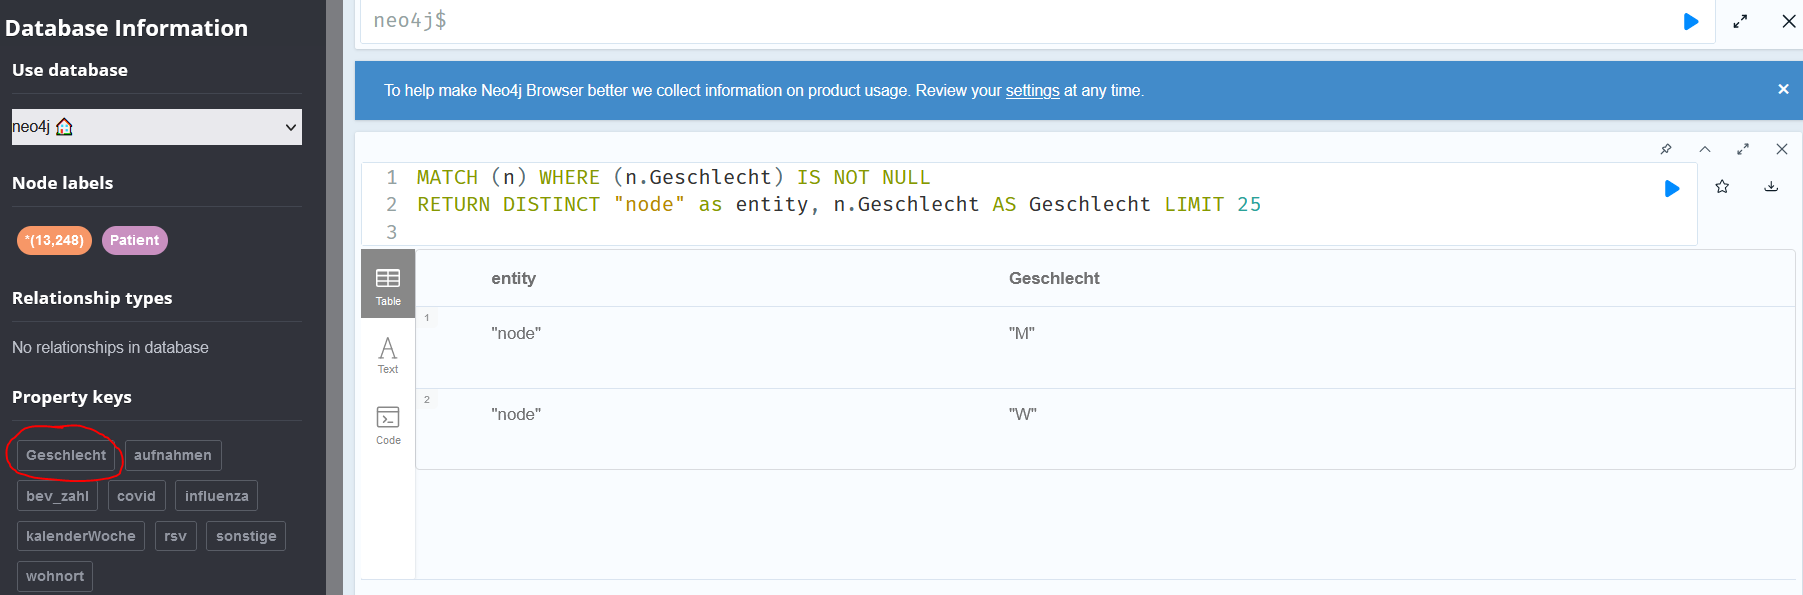

Danach kann der Container wieder geschlossen werden.

In [10]:
!docker ps

CONTAINER ID   IMAGE     COMMAND                  CREATED       STATUS       PORTS                                                      NAMES
eeada986e4c2   neo4j     "tini -g -- /startupâ€¦"   2 hours ago   Up 2 hours   0.0.0.0:7474->7474/tcp, 7473/tcp, 0.0.0.0:7687->7687/tcp   neo4j-container
cf8e78ee5190   mysql     "docker-entrypoint.sâ€¦"   2 weeks ago   Up 2 hours   0.0.0.0:3306->3306/tcp, 33060/tcp                          mysql-docker-db-1


In [11]:
!docker-compose down

In [12]:
!docker-compose -p completx_sql down

 Container neo4j-container  Stopping
 Container neo4j-container  Stopped
 Container neo4j-container  Removing
 Container neo4j-container  Removed
 Network completx_sql_default  Removing
 Network completx_sql_default  Removed


In [15]:
!docker volume ls

DRIVER    VOLUME NAME
local     01e437a5a8d8bc7e245b912d09d43424254839f9a5847bbca14ec50bedb2a39e
local     3_database-data
local     3b3cba9e74c6a871e7eeef09dfc218735c3c80bb62e0be6c1d74ae4ae1de5cf0
local     7d9498ec10cc26718ab37f95f2a204dd7ad2589e13b209033aae93f6f710cd75
local     08bcb7ca145378157cdb24b5d381f9d26ce32377bcadd234df8531f8aa185e8e
local     9f315ccce15adb1ae202b5370383bb3f819fa2b94a2f6b7bd98da7a45ece960e
local     9f97846584768df214df7d0bbe7bfda209a5f858f56c92fe9fb62089fd013d83
local     36ca6ada405c2a4d23bc5e2352d5f79ee0d27d9ed386700932d62cb1095d1fdd
local     96b8c055375e73443dc1d8626a93ff5666bcf8a76c9a98d86bd8ad6d5f0fafd6
local     215a821dc1e4df1fb51d5c53772d1092d0e7eba146f2573de7acf4bbeba893a4
local     315bc658367a4e7dc4c05184404ab09f06116d8f3bfcfb1a69e6fb3d11518883
local     0335d4430df3aab7395cbdd117074792e6e743120a0b2ed3e491612a181ef793
local     5724b7042f2b9f93e8ccb3ca67b34a8fc3411c7a9e91c4afc921b463f73f8b03
local     64838fb91e49288023ec9ef3e2109428192d4e46be

Um ein Volume zu löschen, kann man wieder folgenden Befehl verwenden:

In [14]:
!docker volume rm completx_sql_neo4j-data

completx_sql_neo4j-data


Anbei ist ein GitHub-Repository zu finden, in dem einige Queries sowie Videos verlinkt sind, die Ihnen helfen können, Cypher und Neo4j besser zu verstehen:
https://github.com/cj2001/bite_sized_data_science/tree/main

Ebenfalls sind in der Dokumentation von Neo4j viele hilfreiche Hinweise zu finden, zum Beispiel zum Import von CSV-Dateien über Python:
https://neo4j.com/docs/getting-started/data-import/csv-import/

Zuletzt noch ein Cheatsheet für Cypher: https://neo4j.com/docs/cypher-cheat-sheet/5/auradb-enterprise/